In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

pd.pandas.set_option('display.max_columns',None) 

In [2]:
# read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# describe data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


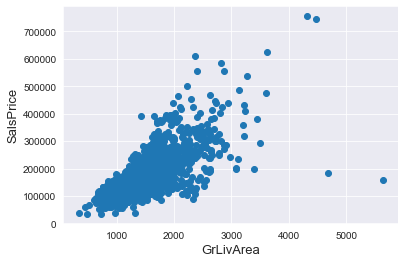

In [4]:
### check for any possible outliers in the train dataset
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalsPrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


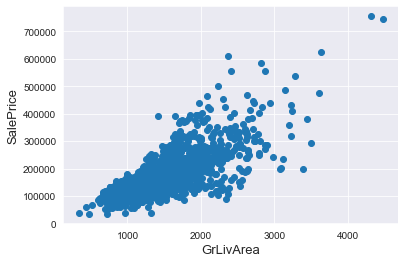

In [5]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# plot the train data again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



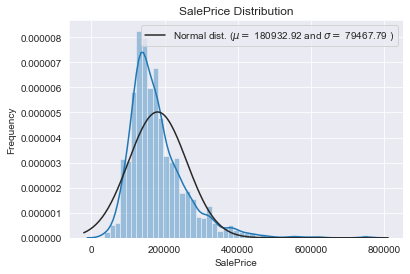

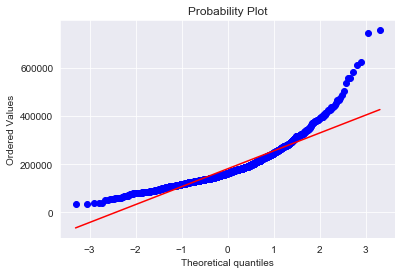

In [6]:
# Analysis on SalePrice 
sns.distplot(train['SalePrice'], fit=norm)

# get the fitted parameter used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:0.2f} and $\sigma=$ {:0.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel("Frequency")
plt.title('SalePrice Distribution')

## Get also the QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

We can see the data is right skewed, so we need to make the data to be normally distributed. So we apply log transformation on taget variable


 mu = 12.02 and sigma = 0.40



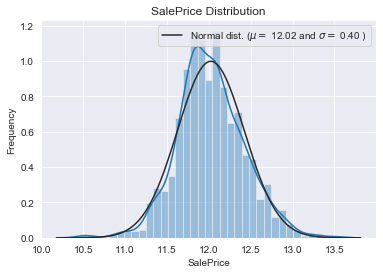

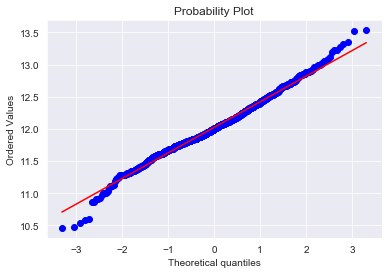

In [7]:
# apply log to target variables
train['SalePrice'] = np.log1p(train['SalePrice'])

# Analysis on SalePrice 
sns.distplot(train['SalePrice'], fit=norm)

# get the fitted parameter used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:0.2f} and $\sigma=$ {:0.2f} )'.format(mu, sigma)],
           loc='best')
plt.ylabel("Frequency")
plt.title('SalePrice Distribution')

## Get also the QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


now we have a normally disributed data. 

#### FEATURE ENGINEERING

In [8]:
# combining train and test dataset

#drop ID column
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
y = train['SalePrice'].reset_index(drop=True)


In [9]:
#collect data into one data frame.
combined = pd.concat((train,test), sort = False).reset_index(drop = True)
combined.drop('SalePrice', axis =1 , inplace = True)

In [10]:
combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


#### Handling missing values

In [11]:
#for feature in combined:
#    if train[feature].isnull().sum() > 0:
#        p = (train[feature].isnull().sum()/len(train) * 100)
#        print("{} percentage of missin values {:.2f}" .format(feature,p))

combined_na = combined.isnull().sum() / len(train) * 100
combined_na = combined_na.drop(combined_na[combined_na == 0].index).sort_values(ascending = False)[:30]
missing = pd.DataFrame({'Missing Value':combined_na})
missing

,Missing Value
PoolQC,199.451303
MiscFeature,192.866941
Alley,186.488340
Fence,160.905350
FireplaceQu,97.393690
LotFrontage,33.333333
GarageFinish,10.905350
GarageYrBlt,10.905350
GarageQual,10.905350
GarageCond,10.905350


Text(0.5, 1.0, 'Percent Missing Data by Featue')

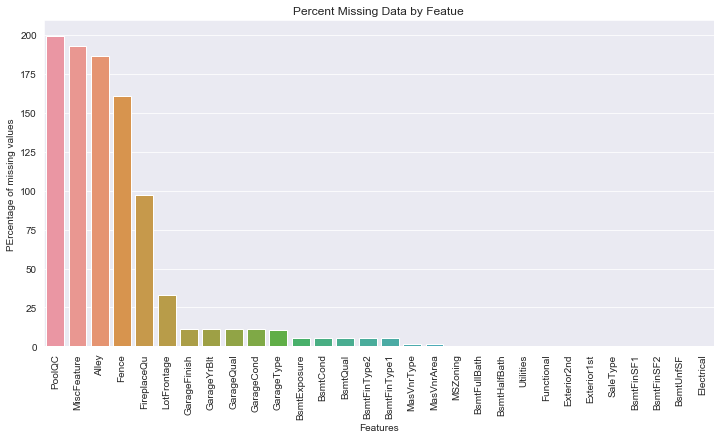

In [12]:
#ploting missing values

f, ax = plt.subplots(figsize = (12,6))
plt.xticks(rotation='90')

sns.barplot(x= combined_na.index , y = combined_na)

plt.xlabel('Features')
plt.ylabel('PErcentage of missing values')
plt.title("Percent Missing Data by Featue")


Filling missing values one by one

In [13]:
#PoolQC .. None means no pool. So it is not a missing value rather it means there is no pool in the house
combined['PoolQC'] = combined['PoolQC'].fillna('none')

In [14]:
#MiscFEatures . NA means None
combined['MiscFeatue'] = combined['MiscFeature'].fillna('none')

In [15]:
#Alley . NA means no Alley access to the property
combined['Alley'] = combined['Alley'].fillna('none')


In [16]:
#Fence . NA means no fence
combined['Fence'] = combined['Fence'].fillna('none')

In [17]:
#FireplaceQU means fireplace quality. NA means no fireplace
combined['FireplaceQu'] = combined['FireplaceQu'].fillna('none')

In [18]:
#Lotfrontage. Linear feet of street connected to property, many values are missing
#combined['LotFrontage'].value_counts()

In [19]:
# their value can be determined by taking the mean values of the lotfrontage of their neighbourhood houses
combined['LotFrontage'] = combined.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median() ) )

In [20]:
# garage year built, NA measns no garrage 
combined['GarageYrBlt'] = combined['GarageYrBlt'].fillna(0)

In [21]:
## garage area, cars ,NA means no cars means 
combined['GarageArea'] = combined['GarageArea'].fillna(0)
combined['GarageCars'] = combined['GarageCars'].fillna(0)

In [22]:
# garage type, quality, condition , finish  where NA means no garage.
for col in ('GarageType' , 'GarageQual' , 'GarageFinish' , 'GarageCond'):
    combined[col] = combined[col].fillna('none')

In [23]:
# basement , NA means none
for col in ('BsmtFinType1' , 'BsmtFinType2' , 'BsmtExposure' , 'BsmtCond' , 'BsmtQual'):
    combined[col] = combined[col].fillna('none')

In [24]:
# MasVnrType: Masonry veneer type,
combined['MasVnrType'] = combined['MasVnrType'].fillna('none')

In [25]:
#MasVnrArea: Masonry veneer area in square feet
combined['MasVnrArea'] = combined['MasVnrArea'].fillna(0)

In [26]:
# electrical system
combined['Electrical'].value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [27]:
combined['Electrical'] =combined['Electrical'].fillna("SBrkr")

In [28]:
# MSZoning: Identifies the general zoning classification of the sale.
combined['MSZoning'].isnull().sum()
combined['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [29]:
combined['MSZoning'] = combined['MSZoning'].fillna(combined['MSZoning'].mode()[0])

In [30]:
combined['MSZoning'].value_counts()

RL         2267
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [31]:
#BsmtFullBath , BsmtHalfBath ,  BsmtfinSf1 , Bsmtsffin2 , Bsmtunsf are NA because they have no basement, 
#so fill this numerical values with 0
for col in ('BsmtFullBath' , 'BsmtHalfBath' ,  'BsmtFinSF1' , 'BsmtFinSF2' , 'BsmtUnfSF', 'TotalBsmtSF'):
    combined[col] = combined[col].fillna(0)

In [32]:
#combined['Utilities'].value_counts() ,AllPub :2916 ,NoSeWa : 1 . This column is of no use, So drop it
combined = combined.drop(['Utilities'] , axis = 1)

In [33]:
#combined['SaleType'].value_counts(). Fill with 'WD'
combined['SaleType'] = combined['SaleType'].fillna(combined['SaleType'].mode()[0])


In [34]:
#combined['Functional'].value_counts() Fill with 'Typ'
combined['Functional'] = combined['Functional'].fillna(combined['Functional'].mode()[0])

In [35]:
#Exterior1st and Exterior2nd: one missing value. substitute with the most common string
combined['Exterior1st'] = combined['Exterior1st'].fillna(combined['Exterior1st'].mode()[0])
combined['Exterior2nd'] = combined['Exterior2nd'].fillna(combined['Exterior2nd'].mode()[0])

In [36]:
#MiscFeatures, NA means none
combined['MiscFeature'] = combined['MiscFeature'].fillna('none')

In [37]:
# Kitchen quality
combined['KitchenQual'] = combined['KitchenQual'].fillna(combined['KitchenQual'].mode()[0])

In [38]:
# checking to see any more missing values
#for feature in combined:
#    if train[feature].isnull().sum() > 0:
#        p = (train[feature].isnull().sum()/len(train) * 100)
#        print("{} percentage of missin values {:.2f}" .format(feature,p))

combined_na = combined.isnull().sum() / len(train) * 100
combined_na = combined_na.drop(combined_na[combined_na == 0].index).sort_values(ascending = False)[:30]
missing = pd.DataFrame({'Missing Value':combined_na})
missing

,Missing Value


transforming some numerical variables that are really categorical

In [39]:
#MSSubClass=The building class
combined['MSSubClass'] = combined['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
combined['OverallCond'] = combined['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
combined['YrSold'] = combined['YrSold'].astype(str)
combined['MoSold'] = combined['MoSold'].astype(str)

In [40]:
combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MiscFeatue
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,none
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,none
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,none
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,none
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,none


In [41]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(combined[c].values))
    combined[c] = lbl.transform(list(combined[c].values))

# shape
combined.shape

(2917, 79)

In [42]:
combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MiscFeatue
0,10,RL,65.0,8450,1,2,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,3,3,2,706.0,5,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,Attchd,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,none,0,4,2,WD,Normal,none
1,5,RL,80.0,9600,1,2,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,3,1,0,978.0,5,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,Attchd,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,none,0,7,1,WD,Normal,none
2,10,RL,68.0,11250,1,2,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,3,2,2,486.0,5,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,Attchd,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,none,0,11,2,WD,Normal,none
3,11,RL,60.0,9550,1,2,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,3,1,3,0,216.0,5,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,none,0,4,0,WD,Abnorml,none
4,10,RL,84.0,14260,1,2,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,3,0,2,655.0,5,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,Attchd,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,none,0,3,2,WD,Normal,none


In [43]:
# Adding total sqfootage feature 
combined['TotalSF'] = combined['TotalBsmtSF'] + combined['1stFlrSF'] + combined['2ndFlrSF']

combined['Total_sqr_footage'] = (combined['BsmtFinSF1'] + combined['BsmtFinSF2'] + combined['1stFlrSF'] + combined['2ndFlrSF'])

Skewed Features . To get the data normally distributed

In [44]:
numeric_feats = combined.dtypes[combined.dtypes != 'object'].index
# check skewness of all numeric value
skewed_feats = combined[numeric_feats].apply( lambda x : skew(x.dropna()) ).sort_values(ascending = False)
print("Skew in numerical featres : \n")
skewness = pd.DataFrame({'skew' : skewed_feats})
skewness.head(8)


Skew in numerical featres : 



,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503


In [45]:
# correcting of skewness using BoxCox
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
skewed_features =  skewness.index
for feat in skewed_features:
    combined[feat] = boxcox1p(combined[feat], boxcox_normmax(combined[feat] + 1))
    

There are 60 skewed numerical features to Box Cox transform


In [46]:
combined = pd.get_dummies(combined)
combined.shape

(2917, 227)

Modeling

In [47]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [48]:
#Divide data once again
X = combined.iloc[:len(y), :]
X_sub = combined.iloc[len(y):, :]

In [49]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

def rmse_cv(model, X = X):
    return np.sqrt(-1 * cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))

In [50]:
alphas_rid = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas_las = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [51]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_rid, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas_las, random_state=42, cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)


In [52]:
#test several model performance using cross val.
from datetime import datetime
score = rmse_cv(ridge)
print("Ridge: {:.4f} ({:.4f}\n".format(score.mean(), score.std()), datetime.now())
score = rmse_cv(lasso)
print("Lasso: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now()) 
score = rmse_cv(elasticnet)
print("Elastic Net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now() )
score = rmse_cv(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now() )
score = rmse_cv(lightgbm)
print("lightgmb: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now() )
score = rmse_cv(xgboost)
print("XGBoost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now() )

Ridge: 0.1096 (0.0160
 2020-03-17 23:45:08.623078
Lasso: 0.1088 (0.0155)
 2020-03-17 23:45:30.028754
Elastic Net: 0.1088 (0.0156)
 2020-03-17 23:46:45.277536
SVR: 0.1536 (0.0289)
 2020-03-17 23:47:00.395952
lightgmb: 0.1142 (0.0163)
 2020-03-17 23:47:27.654792
XGBoost: 0.1130 (0.0158)
 2020-03-17 23:50:15.846031


In [ ]:
#train each model using the whole training data.
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
elastic_model_full_data = elasticnet.fit(X, y)
lasso_model_full_data = lasso.fit(X, y)
ridge_model_full_data = ridge.fit(X, y)
svr_model_full_data = svr.fit(X, y)
xgb_model_full_data = xgboost.fit(X, y)
lgb_model_full_data = lightgbm.fit(X, y)

In [ ]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.2 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [ ]:
print('RMSLE score on train data:')
print(rmse(y, blend_models_predict(X)))

In [ ]:
print('Predict submission')
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_sub)))
submission.to_csv("submission.csv", index=False)
